![cao logo](https://monaghaninstitute.ie/wp-content/uploads/2016/06/cao-logo-links-page.jpg)

# CAO Points (2019-2021)

## About this notebook
***

This notebook shows how to load data into a `pandas` dataframe, manipulate the data within dataframes, and operate a basic analysis of the data using CAO points from 2019 to 2021 as our original datasets. All the data used thoughout this notebook can be found in the [Central Applications Office website](https://www.cao.ie/).

## What are the CAO points
***

The Central Applications Office is the organisation that oversees undergraduate applications to colleges and universities in Ireland. The CAO points system awards points to students based on their achievements in the Leaving Certificate examination, with the maximum score possible being 625 points. Based on their CAO points, students are placed in a queue for courses that had more applicants than available places \[1\].

## Understanding the data
***

The data available on the CAO website are not presented in a single, standardised format. Instead, data from different years is often available on different file types (for instance, \*.xlsx, \*.hmtl, or \*.pdf files). Even when it is presented in the same type of file, the data is not consistent across different years or for different institutions: the notation varies, the columns are not the same for every year, some of the values have different formats for different years etc.

CAO points are positive [discrete data](https://www.thedrum.com/profile/whatagraph/news/discrete-vs-continuous-data-whats-the-difference#:~:text=Discrete%20data%20is%20a%20count,%2C%20and%20non%2Dnegative%20integers), but some courses require additional tests/interviews/portfolios from the applicant - this information is [categorical](http://www.stat.yale.edu/Courses/1997-98/101/catdat.htm), in our case simplified to 'yes' (the course has this additional requirement) or 'no' (the course does not have additional requirements).

The only data points present in all 3 data sets (2019, 2020, and 2021) are:
1. **EOS points:** Minimum score achieved by applicants who were offered a place in a given course (considering rounds 1 and 2).
2. **Mid points:** Score of the applicant in the middle of a ranked list of offerees.
3. **Test:** Whether the course requires additional tests/interviews/portfolios.

For this reason, this are the data that we will use for our comparison. Only Level 8 courses were considered for this project.

## Requirements
***

### Importing packages

This project requires that we import a number of additional Python packages/modules. An indication of what each module used in this project does in given in the comments in the code below.

**Note:** We used [Camelot](https://camelot-py.readthedocs.io/en/master/) to parse 2019 points, which were available in a PDF format. Before importing it, however, we need to install the module and its dependencies (Ghostscript and ActiveTLC). To install Camelot, first install the dependencies using [this link](https://ghostscript.com/releases/gsdnld.html) and [this link](https://www.activestate.com/products/tcl/#how-do-i-download-tcl-for-windows-linux-or-mac). Then, open your console and type:

   ```
   conda install -c conda-forge camelot-py
   ```

In [2]:
#Download and save data from CAO website
import urllib.request as urlrq

#PDF table extraction
import camelot

#Handle ZIP files
import zipfile

#Date and time for file names
import datetime as dt

#Arrays
import numpy as np

#Dataframes
import pandas as pd

#Plotting
import matplotlib.pyplot as plt

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Saving and backing-up files
***

An important task in Data Analysis is establishing a routine of backing-up the original data sets. This way, you can always revert back to the original file even if you mess up with the data set further down when handling it. Another good practice is to give your files a timestamp, so you have the exact date and time when you saved it.

The code below uses the function `dt.datetime.now()` to create a string with the timestamp that will be used in our saves files.

In [4]:
# Current date and time
now = dt.datetime.now()

# Format as string
nowstr = now.strftime('%Y%m%d_%H%M%S')

## CAO points 2021
***

### Data source
http://www.cao.ie/index.php?page=points&p=2021

In [3]:
#Original file
url2021 = 'http://www2.cao.ie/points/CAOPointsCharts2021.xlsx'

### Save original file

In [4]:
#Create a file path for the original data
pathxlsx2021 = 'data/2021/cao2021_original_' + nowstr + '.xlsx'

urlrq.urlretrieve(url2021, pathxlsx2021)


('data/2021/cao2021_original_20211226_172002.xlsx',
 <http.client.HTTPMessage at 0x161f9b89130>)

### Load data using `pandas`

CAO points for 2021 are available as an Excel spreadsheet with 15 columns, where the first 11 rows have a preambule and a description of the columns. We start our code, then, by loading this spreadsheet into a `pandas` dataframe using `pd.read_excel` and skiping the first 11 rows \[2\] \[3\].

In [5]:
# Download and parse the excel spreadsheet.
df2021 = pd.read_excel(url2021, skiprows=11)

In [6]:
#Spotcheck
#Courses start from line 13 in the original dataset
df2021.iloc[690]

CATEGORY (ISCED Description)                      Arts
Course Title                       Economics/Geography
Course Code                                      TR198
R1 Points                                          968
R1 Random                                          NaN
R2 Points                                          956
R2 Random                                          NaN
EOS Points                                         954
EOS Random                                         NaN
EOS Midpoints                                      NaN
Course Level                                         8
HEI                             Trinity College Dublin
Test/Interview                                     NaN
AVP                                                NaN
v                                                  NaN
Name: 690, dtype: object

In [7]:
#Spotcheck last row
df2021.iloc[-1]

CATEGORY (ISCED Description)          Business and administration
Course Title                         Business Information Systems
Course Code                                                 WD232
R1 Points                                                     261
R1 Random                                                     NaN
R2 Points                                                     261
R2 Random                                                     NaN
EOS Points                                                    261
EOS Random                                                    NaN
EOS Midpoints                                                 329
Course Level                                                    8
HEI                             Waterford Institute of Technology
Test/Interview                                                NaN
AVP                                                           avp
v                                                             NaN
Name: 1450

### Cleaning up dataframe

As we are only considering Level 8 courses, we only keep the relevant rows in our dataframe.

In [9]:
#Remove space from Course Level header
df2021_l8 = df2021.rename(columns={'Course Level': 'level'})

#Select only level 8 courses
df2021_l8 = df2021_l8[df2021_l8.level == 8]

Next thing we do is to keep only the columns that interest us - i.e. the course codes, their titles, EOS and Mid points, and whether or not it had additional requirements. To simplify our headers, we renamed the columns. We also already replaced all 'AQA' values with 0. 'AQA' means that all qualified applicants were offered a place so we considered the minimum points (EOS), to be 0. `DataFrame.head()`, then, show the first 5 rows of the dataframe \[4\].

In [10]:
#Select only relevant columns and reorder
#These are columns common to all 3 years
df2021 = df2021_l8[['Course Code','Course Title', 'EOS Points', 'EOS Midpoints', 'Test/Interview']]

#Change headers
df2021.columns = ['code', 'course name', 'EOS', 'Mid','test']

#Replace AQA values with 0
df2021 = df2021.replace('AQA',0)

In [11]:
#Show first 5 rows
df2021.head()

,code,course name,EOS,Mid,test
29,AL801,Software Design for Virtual Reality and Gaming,300,359,NaN
30,AL802,Software Design in Artificial Intelligence for...,313,381,NaN
31,AL803,Software Design for Mobile Apps and Connected ...,350,398,NaN
32,AL805,Computer Engineering for Network Infrastructure,321,381,NaN
33,AL810,Quantity Surveying,328,377,NaN


For 2021, some row for the EOS column had the non-numerical value '\#', meaning that extra requirements (here referred to as 'test') were needed for the course. Some courses, however, didn't have this information on the dedicated column (For instance, the course code DN411). Because of this, we add a '#' to the column test whenever this value appears in the EOS column. When this information was in the Mid column, it was always also in EOS.

In [12]:
#If value in EOS column is '#', modify value in 'test' column
#This is because some of the '#' were misplaced in the original dataset
df2021.loc[df2021.EOS == '#', 'test'] = '#'

#Spotcheck known value
df2021.loc[786]

code                                  DN411
course name    Radiography - Graduate Entry
EOS                                       #
Mid                                     NaN
test                                      #
Name: 786, dtype: object

With this information stored in a dedicated column, we can safely remove it from the numerical columns (EOS and Mid). Here we used `DataFrame.replace()` to replace all '#' in the selected columns with 0, and combined it with `DataFrame.fillna()` to replace empy values (NaN) also with 0. To be sure that no strings were left in those 2 columns, we used `DataFrame.dtypes` to check the data type of their values \[5\] \[6\] \[7\] \[8\] \[9\].

In [13]:
#Replace '#' values on numerical columns with zeros
df2021[['EOS','Mid']] = df2021[['EOS','Mid']].replace('#',0).fillna(0)

#Check if all points are numerical
df2021[['EOS','Mid']].dtypes

EOS    float64
Mid    float64
dtype: object

Our data for test is categorical (either yes or no), so we replace all '#' in that column with 'yes' and all NaN values with 'no'.

In [14]:
#Replace NaN values in column test with 'no', and '#' values with string 'yes'
df2021['test'] = df2021['test'].replace('#','yes').fillna('no')
df2021.head()

,code,course name,EOS,Mid,test
29,AL801,Software Design for Virtual Reality and Gaming,300.0,359.0,no
30,AL802,Software Design in Artificial Intelligence for...,313.0,381.0,no
31,AL803,Software Design for Mobile Apps and Connected ...,350.0,398.0,no
32,AL805,Computer Engineering for Network Infrastructure,321.0,381.0,no
33,AL810,Quantity Surveying,328.0,377.0,no


Finally, we save our dataframe as a csv file using `DataFrame.to_csv()`

In [17]:
# File path for csv dataset
path2021 = 'data/2021/cao2021_' + nowstr + '.csv'

In [18]:
# Save pandas dataframe
df2021.to_csv(path2021)

## CAO points 2020
***

### Data source
https://www.cao.ie/index.php?page=points&p=2020

In [15]:
#Original file
url2020 = 'http://www2.cao.ie/points/CAOPointsCharts2020.xlsx'

### Save original file

In [20]:
#Back-up xlsx file with timestamp
pathxlsx2020 = 'data/2020/cao2020_original_' + nowstr + '.xlsx'
urlrq.urlretrieve(url2020, pathxlsx2020)

('data/2020/cao2020_original_20211226_172002.xlsx',
 <http.client.HTTPMessage at 0x161fa3db7f0>)

### Load data using `pandas`

Same as 2021, CAO data for 2020 is available in an Excel sheet. To load it with `pandas` we simply repeat what we did for 2021 - this time, however, skiping the first 10 rows of preambule etc.

In [17]:
df2020 = pd.read_excel(url2020, skiprows=10)

### Cleaning up dataframe

In [18]:
#Select only L8 courses
df2020_l8 = df2020[df2020.LEVEL == 8]

#Select columns
df2020 = df2020_l8[['COURSE CODE2','COURSE TITLE', 'EOS', 'EOS Mid-point', 'Test/Interview #']]

#Change headers
df2020.columns = ['code', 'course name', 'EOS', 'Mid', 'test']

#Show first 5 rows
df2020.head()

,code,course name,EOS,Mid,test
0,AC120,International Business,209,280,NaN
1,AC137,Liberal Arts,252,270,NaN
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,#+matric,#
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,#+matric,#
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,#+matric,#


The column 'test' was fine in the original dataset (i.e. it had the right information about all courses with additional requirements), but we still need to remove non-numerical values such as '\#', '\#+matric', and 'AQA' from columns with points. Again, we can do this using `DataFrame.replace` and combine it with `Dataframe.fillna()` to fill the NaN values. 

An additional complication here, however, is that some values in the EOS column have the '#' character in front of the numerical value, so we need to remove that as well. As it is not a standalone value, we used `regex=True` so it replaces any '#' character of a string in the selected column with an empty string '', effectively removing that character.

In [19]:
#Replace non-numerical values with 0 for selected columns
df2020[['EOS','Mid']] = df2020[['EOS','Mid']].replace(['#','#+matric','AQA'],0).fillna(0)

#Use regex to remove particular character instead of matching whole value
df2020.EOS = df2020.EOS.replace('#','', regex=True)

#Check known value
df2020.loc[1158]

code                        TR311
course name    Film/Drama Studies
EOS                           521
Mid                         557.0
test                            #
Name: 1158, dtype: object

We can see that the EOS value is now a number, but an int instead of a float. To change that and keep the numerical data consistent across all years, we change the data type using `DataFrame.astype({columnname:dtype})` \[10\] \[11\] \[12\].

In [20]:
#Change dtype of column EOS to float
df2020 = df2020.astype({'EOS': float})

Again, we replace all '\#' in the test column with 'yes' and all NaN with 'no' before saving our cleaned up dataframe.

In [21]:
#Replace NaN values in column test with 'no', and '#' values with string 'yes'
df2020['test'] = df2020['test'].replace('#','yes').fillna('no')

#Show first 5 rows
df2020.head()

,code,course name,EOS,Mid,test
0,AC120,International Business,209.0,280.0,no
1,AC137,Liberal Arts,252.0,270.0,no
2,AD101,"First Year Art & Design (Common Entry,portfolio)",0.0,0.0,yes
3,AD102,Graphic Design and Moving Image Design (portfo...,0.0,0.0,yes
4,AD103,Textile & Surface Design and Jewellery & Objec...,0.0,0.0,yes


In [29]:
#Save as csv
path2020 = 'data/2020/cao2020_' + nowstr + '.csv'
df2020.to_csv(path2020)

## CAO points 2019
***

### Data source
https://www.cao.ie/index.php?page=points&p=2019

In [22]:
#Original file
url2019 = 'http://www2.cao.ie/points/lvl8_19.pdf'

### Save original file

In [31]:
#Create a file path for the original data
pathpdf2019 = 'data/2019/cao2019_original_' + nowstr + '.pdf'
urlrq.urlretrieve(url2019, pathpdf2019)

('data/2019/cao2019_original_20211226_172002.pdf',
 <http.client.HTTPMessage at 0x161fa3dbf10>)

### Load data using `pandas`

Data from 2019 is available as a PDF file. Instead of manually converting it into a spreadsheet and then read it into `pandas`, we opted to use `camelot`, which parses the data from tables on PDF directly into `pandas`. However, instead of creating a single dataframe, `camelot` creates a list of dataframes where each PDF page is read into 1 dataframe. As the original file had 18 pages, this method resulted in 18 dataframes. It also takes a bit of time to run.

In [24]:
#Extract PDF table with multiple pages
#Camelot creates 1 table per PDF page
tables = camelot.read_pdf('http://www2.cao.ie/points/lvl8_19.pdf', pages = '1-end')

#Check number of tables in the list
tables

<TableList n=18>

Our next step, then, is to concatenate all those dataframes into one. We can do this by creating an empty list, interate through the dataframes in `tables` and append them to the list. Then, we can use `pd.concat()` to join them all.

In [25]:
#Concat multiple tables in a single dataframe

empty_list = []
for t in range(tables.n):
    data = tables[t].df
    
    empty_list.append(data)
    df2019 = pd.concat(empty_list, ignore_index=False, sort=False)
    

### Cleaning up dataframe

The original dataset had only 4 columns, and missed one specifically to deal with courses that required Tests/Interviews. This was indicated with a '#' character in the EOS column values - in some cases, with the '#' character preceding the actual points. Where this happens, we should move this information to a separate column and only keep numerical values for points. The index started at 0 after each table, even after concatenating them, so we reset the index too, dropping the original indexation entirely using `drop=True` \[13\].

Also, the '\*' character denoted courses where not all on the point score were offered places. We won't need this information for our analysis and will remove this character from our dataframe.

In [26]:
#Add new column to store courses with Test/Interview
df2019.insert(4, 'test','')

#Headers are blank, so we first change them
df2019.columns = ['code','course name', 'EOS', 'Mid','test']

In [27]:
#Restart index
df2019 = df2019.reset_index(drop=True)

#Show first 5 rows
df2019.head()

,code,course name,EOS,Mid,test
0,Course Code INSTITUTION and COURSE,,EOS,Mid,
1,,Athlone Institute of Technology,,,
2,AL801,Software Design with Virtual Reality and Gaming,304,328,
3,AL802,Software Design with Cloud Computing,301,306,
4,AL803,Software Design with Mobile Apps and Connected...,309,337,


As we can see above, we still need to remove the first row as well as all rows containing only the name of the institution. We can do that by keeping only those rows where the value in the column 'code' is not an empty space. We also used `DataFrame.drop()` to drop the first (`labels=[0]`) row (`axis=0`) \[14\].

In [28]:
#If no value in column 'code', remove row
#Also, remove first row with messed up headers
df2019 = df2019[df2019.code != ''].drop(labels=[0], axis=0)

df2019.head()

,code,course name,EOS,Mid,test
2,AL801,Software Design with Virtual Reality and Gaming,304,328,
3,AL802,Software Design with Cloud Computing,301,306,
4,AL803,Software Design with Mobile Apps and Connected...,309,337,
5,AL805,Network Management and Cloud Infrastructure,329,442,
6,AL810,Quantity Surveying,307,349,


Camelot read some empty values as empty strings, so we replace these with 0 for columns with points and fill eventual NaN values.

In [29]:
#Replace empty values
df2019[['EOS','Mid']] = df2019[['EOS','Mid']].replace('',0).fillna(0)

In [30]:
#Check known value
df2019.loc[440]

code                   AD217
course name     Illustration
EOS            # +matric 625
Mid                        0
test                        
Name: 440, dtype: object

In [31]:
#Remove '*' characters
df2019 = df2019.replace('\*','', regex=True)

In [32]:
#Check known value
df2019.loc[130]

code              CK201
course name    Commerce
EOS                 465
Mid                 489
test                   
Name: 130, dtype: object

In [33]:
#Replace the expression '#\+matric ' with '#'
#They seem to refer to the same thing
df2019 = df2019.replace('# \+matric ','#', regex=True)

In [34]:
#Check known value
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                    #625
Mid                       0
test                       
Name: 440, dtype: object

In [35]:
#If '#' values in EOS column, add it to test column
df2019.loc[df2019.EOS == '#', 'test'] = '#'

In [36]:
#Check known value
df2019.loc[925]

code                                                       TL889
course name    Counselling with Addiction - Mature applicants...
EOS                                                            #
Mid                                                            0
test                                                           #
Name: 925, dtype: object

In [37]:
#Replace '#' values from EOS column with 0
df2019['EOS'] = df2019['EOS'].replace('#',0)

In [38]:
#Check known value
df2019.loc[925]

code                                                       TL889
course name    Counselling with Addiction - Mature applicants...
EOS                                                            0
Mid                                                            0
test                                                           #
Name: 925, dtype: object

In [39]:
#Move remaining '#' characters in EOS column to test column
df2019.loc[df2019['EOS'].str.contains('#', na=False), 'test'] = '#'
df2019['EOS'] = df2019['EOS'].str.replace('#', '')

In [40]:
#Check known value
df2019.loc[783]

code                                         LM026
course name    Performing Arts (audition required)
EOS                                            307
Mid                                            367
test                                             #
Name: 783, dtype: object

In the original dataset, '\ +matric' values were in the EOS column and Mid points were provided in the Mid column for rows 432-438, 440 and 441. Camelot read it wrongly and put what was supposed to be in the Mid column in the EOS column. We need to swap these values using `DataFrame.loc[].values`. 

In [41]:
#Example of messed up row
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                     625
Mid                       0
test                      #
Name: 440, dtype: object

In [42]:
#Swap values between columns for selected rows
df2019.loc[[432,433,434,435,436,437,438,440,441],['EOS','Mid']] = df2019.loc[[432,433,434,435,436,437,438,440,441],['Mid','EOS']].values

In [43]:
#Check again
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                       0
Mid                     625
test                      #
Name: 440, dtype: object

We also convert all numeric values to float to keep it consistent with the other dataframes.

In [44]:
df2019 = df2019.astype({'EOS': float, 'Mid': float})

Finally, we replace '\#' and empty values in the column test with 'yes' and 'no', respectively, before saving the resulting dataframe.

In [45]:
#Replace '#' and empty values (NaN icluded) in column test
df2019['test'] = df2019['test'].replace(['#',''],['yes','no']).fillna('no')

#Show first 5 rows
df2019.head()

,code,course name,EOS,Mid,test
2,AL801,Software Design with Virtual Reality and Gaming,304.0,328.0,no
3,AL802,Software Design with Cloud Computing,301.0,306.0,no
4,AL803,Software Design with Mobile Apps and Connected...,309.0,337.0,no
5,AL805,Network Management and Cloud Infrastructure,329.0,442.0,no
6,AL810,Quantity Surveying,307.0,349.0,no


In [46]:
#Check known value
df2019.loc[440]

code                  AD217
course name    Illustration
EOS                     0.0
Mid                   625.0
test                    yes
Name: 440, dtype: object

In [59]:
pathcsv2019 = 'data/2019/cao2019_' + nowstr + '.csv'

In [60]:
df2019.to_csv(pathcsv2019)

<br>

## Consolidating data frames
***

All code for this section was adapted from the lecture on deduplication of data, for the module Fundamentals of Data Analysis @GMIT (Winter 2021-2022).

We start by creating new dataframes for each year, keeping only the columns 'code' and 'course name'.

#### 2021

In [47]:
courses2021 = df2021[['code', 'course name']]
courses2021.head()

,code,course name
29,AL801,Software Design for Virtual Reality and Gaming
30,AL802,Software Design in Artificial Intelligence for...
31,AL803,Software Design for Mobile Apps and Connected ...
32,AL805,Computer Engineering for Network Infrastructure
33,AL810,Quantity Surveying


#### 2020

In [48]:
courses2020 = df2020[['code', 'course name']]
courses2020.head()

,code,course name
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design (portfo...
4,AD103,Textile & Surface Design and Jewellery & Objec...


#### 2019

In [49]:
courses2019 = df2019[['code', 'course name']]
courses2019.head()

,code,course name
2,AL801,Software Design with Virtual Reality and Gaming
3,AL802,Software Design with Cloud Computing
4,AL803,Software Design with Mobile Apps and Connected...
5,AL805,Network Management and Cloud Infrastructure
6,AL810,Quantity Surveying


We then create a new dataframe by concatenating the 3 and sorting by the values on column 'code'. We set `ignore_index=True` to label the index in the resulting dataframe from 0 to n-1.

In [50]:
#Concat courses and sort by code
allcourses = pd.concat([courses2021, courses2020, courses2019], ignore_index=True).sort_values('code')
allcourses

,code,course name
1034,AC120,International Business
2229,AC120,International Business
175,AC120,International Business
1035,AC137,Liberal Arts
2230,AC137,Liberal Arts
...,...,...
2990,WD230,Mechanical and Manufacturing Engineering
2060,WD230,Mechanical and Manufacturing Engineering
1031,WD230,Mechanical and Manufacturing Engineering
1032,WD231,Early Childhood Care and Education


In [51]:
#Finds all extra copies of duplicated rows
allcourses[allcourses.duplicated()]

,code,course name
2229,AC120,International Business
175,AC120,International Business
2230,AC137,Liberal Arts
176,AC137,Liberal Arts
1037,AD102,Graphic Design and Moving Image Design (portfo...
...,...,...
2058,WD211,Creative Computing
2989,WD212,Recreation and Sport Management
1030,WD212,Recreation and Sport Management
2060,WD230,Mechanical and Manufacturing Engineering


In [52]:
#Returns a copy of the data frame with duplciates removed
allcourses.drop_duplicates()

,code,course name
1034,AC120,International Business
1035,AC137,Liberal Arts
1036,AD101,"First Year Art & Design (Common Entry,portfolio)"
312,AD101,"First Year Art and Design (Common Entry,portfo..."
2475,AD101,First Year Art & Design (Common Entry)
...,...,...
2988,WD211,Creative Computing
2059,WD212,Recreation and Sport Management
2990,WD230,Mechanical and Manufacturing Engineering
1032,WD231,Early Childhood Care and Education


In [53]:
#Finds all extra copies of duplicated rows
allcourses[allcourses.duplicated(subset=['code'])]

,code,course name
2229,AC120,International Business
175,AC120,International Business
2230,AC137,Liberal Arts
176,AC137,Liberal Arts
312,AD101,"First Year Art and Design (Common Entry,portfo..."
...,...,...
2058,WD211,Creative Computing
2989,WD212,Recreation and Sport Management
1030,WD212,Recreation and Sport Management
2060,WD230,Mechanical and Manufacturing Engineering


In [54]:
#Returns a copy of the data frame with duplicates removed for column code
allcourses.drop_duplicates(subset=['code'], inplace=True, ignore_index=True)

#Show firs 5 rows
allcourses.head()

,code,course name
0,AC120,International Business
1,AC137,Liberal Arts
2,AD101,"First Year Art & Design (Common Entry,portfolio)"
3,AD102,Graphic Design and Moving Image Design
4,AD103,Textile & Surface Design and Jewellery & Objec...


### Add points

With all duplicates removed, we can join the remaining columns for each year using `DataFrame.join()`. For that, we first match the index of our 'base' dataframes (`df2021`, `df2020`, and `df2019`) with the index of the consolidated dataframe `allcourses`. Course codes are unique values so we used as them index.

#### 2021

In [55]:
# Set the index to code for 2021
df2021.set_index('code', inplace=True)
df2021.columns = ['course name', 'EOS_2021', 'Mid_2021', 'test_2021']

#Set the index to the code for allcourses
allcourses.set_index('code', inplace=True)

#Join dataframes
allcourses = allcourses.join(df2021[['EOS_2021','Mid_2021','test_2021']])
allcourses.head()

#### 2020

In [58]:
#2020 points
df2020_points = df2020[['code','EOS','Mid','test']]
df2020_points.columns = ['code','EOS_2020','Mid_2020','test_2020']

# Set index to code for 2020
df2020_points.set_index('code', inplace=True)

# Join 2020 points to allcourses
allcourses = allcourses.join(df2020_points)
allcourses.head()

,course name,EOS_2021,Mid_2021,test_2021,EOS_2020,Mid_2020,test_2020
code,,,,,,,
AC120,International Business,294.0,352.0,no,209.0,280.0,no
AC137,Liberal Arts,270.0,334.0,no,252.0,270.0,no
AD101,"First Year Art & Design (Common Entry,portfolio)",554.0,604.0,yes,0.0,0.0,yes
AD102,Graphic Design and Moving Image Design,538.0,625.0,yes,0.0,0.0,yes
AD103,Textile & Surface Design and Jewellery & Objec...,505.0,581.0,yes,0.0,0.0,yes


#### 2019

In [59]:
#2019 points
df2019_points = df2019[['code','EOS','Mid','test']]
df2019_points.columns = ['code','EOS_2019','Mid_2019','test_2019']

# Set index to code for 2019
df2019_points.set_index('code', inplace=True)

# Join 2019 points to allcourses
allcourses = allcourses.join(df2019_points)
allcourses.head()

,course name,EOS_2021,Mid_2021,test_2021,EOS_2020,Mid_2020,test_2020,EOS_2019,Mid_2019,test_2019
code,,,,,,,,,,
AC120,International Business,294.0,352.0,no,209.0,280.0,no,234.0,269.0,no
AC137,Liberal Arts,270.0,334.0,no,252.0,270.0,no,252.0,275.0,no
AD101,"First Year Art & Design (Common Entry,portfolio)",554.0,604.0,yes,0.0,0.0,yes,0.0,550.0,yes
AD102,Graphic Design and Moving Image Design,538.0,625.0,yes,0.0,0.0,yes,0.0,635.0,yes
AD103,Textile & Surface Design and Jewellery & Objec...,505.0,581.0,yes,0.0,0.0,yes,0.0,545.0,yes


NaN values indicate that the course was not offered that year. For instance, `SG441` has NaN values for all columns except those related to 2019, meaning that the course was only offered in or up to 2019. We decided to keep these NaN values because they are treated as floats by `pandas`, and will not impact on the subsequent analysis.

In [60]:
allcourses.loc['SG441']

course name    Environmental Science
EOS_2021                         NaN
Mid_2021                         NaN
test_2021                        NaN
EOS_2020                         NaN
Mid_2020                         NaN
test_2020                        NaN
EOS_2019                       297.0
Mid_2019                       358.0
test_2019                         no
Name: SG441, dtype: object

In [81]:
#Save consolidated dataframe
pathcsvfinal = 'data/consolidated_' + nowstr + '.csv'
allcourses.to_csv(pathcsvfinal)

## Analysing consolidated dataframe
***

Our consolidated dataframe (`allcourses`) has the points for courses that don't have additional requirements, in which the maximum possible score is 625 point, and those that don't have them, which can have scores higher than 625 due to points earned by portfolio, interview etc. We found it useful, then, to create separate dataframes for each of these. We will focus our analysis here on the courses that don't have additional requirements.

In [63]:
#Select only courses without additional requirements
allcourses_notest = allcourses.loc[(allcourses['test_2021']!='yes') & (allcourses['test_2020']!='yes') & (allcourses['test_2019']!='yes')]
allcourses_notest

,course name,EOS_2021,Mid_2021,test_2021,EOS_2020,Mid_2020,test_2020,EOS_2019,Mid_2019,test_2019
code,,,,,,,,,,
AC120,International Business,294.0,352.0,no,209.0,280.0,no,234.0,269.0,no
AC137,Liberal Arts,270.0,334.0,no,252.0,270.0,no,252.0,275.0,no
AD215,Visual Culture,300.0,380.0,no,320.0,389.0,no,300.0,338.0,no
AL801,Software Design with Virtual Reality and Gaming,300.0,359.0,no,303.0,367.0,no,304.0,328.0,no
AL802,Software Design in Artificial Intelligence for...,313.0,381.0,no,332.0,382.0,no,301.0,306.0,no
...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing,270.0,392.0,no,271.0,318.0,no,275.0,322.0,no
WD212,Recreation and Sport Management,262.0,304.0,no,270.0,349.0,no,274.0,311.0,no
WD230,Mechanical and Manufacturing Engineering,230.0,361.0,no,253.0,369.0,no,273.0,348.0,no


In [62]:
#Select only courses with additional requirements
allcourses_test = allcourses.loc[(allcourses['test_2021'] =='yes') & (allcourses['test_2020'] =='yes') & (allcourses['test_2019'] =='yes')]
allcourses_test

,course name,EOS_2021,Mid_2021,test_2021,EOS_2020,Mid_2020,test_2020,EOS_2019,Mid_2019,test_2019
code,,,,,,,,,,
AD101,"First Year Art & Design (Common Entry,portfolio)",554.0,604.0,yes,0.0,0.0,yes,0.0,550.0,yes
AD102,Graphic Design and Moving Image Design,538.0,625.0,yes,0.0,0.0,yes,0.0,635.0,yes
AD103,Textile & Surface Design and Jewellery & Objec...,505.0,581.0,yes,0.0,0.0,yes,0.0,545.0,yes
AD202,Education & Design or Fine Art (Second Level T...,591.0,620.0,yes,0.0,0.0,yes,0.0,580.0,yes
AD204,Fine Art,514.0,583.0,yes,0.0,0.0,yes,0.0,600.0,yes
...,...,...,...,...,...,...,...,...,...,...
TR009,Music Education,486.0,530.0,yes,420.0,532.0,yes,430.0,465.0,yes
TR025,Drama and Theatre Studies,509.0,552.0,yes,530.0,581.0,yes,489.0,531.0,yes
TR051,Medicine (HPAT required),743.0,751.0,yes,734.0,745.0,yes,730.0,739.0,yes


<br><br>

### Describing columns

We can have a sense of the data by using the `pandas` function `DataFrame.describe()`, which returns a description of the dataframe or of a section of it -  in our case, we selected individual columns. With `DataFrame.describe()` we can quickly see the count, mean, standard deviation, min and max values, as well as the quartiles \[15\].

#### EOS 2021

In [66]:
allcourses_notest['EOS_2021'].describe()

count    932.000000
mean     394.095494
std      127.217062
min        0.000000
25%      300.000000
50%      388.500000
75%      498.000000
max      966.000000
Name: EOS_2021, dtype: float64

#### EOS 2020

In [67]:
allcourses_notest['EOS_2020'].describe()

count    917.000000
mean     370.679389
std      106.457762
min        0.000000
25%      298.000000
50%      352.000000
75%      454.000000
max      613.000000
Name: EOS_2020, dtype: float64

#### EOS 2019

In [68]:
allcourses_notest['EOS_2019'].describe()

count    828.000000
mean     357.559179
std       91.465656
min      168.000000
25%      288.000000
50%      338.500000
75%      423.250000
max      601.000000
Name: EOS_2019, dtype: float64

#### Mid 2021

In [69]:
allcourses_notest['Mid_2021'].describe()

count    932.000000
mean     445.225322
std      107.758645
min        0.000000
25%      375.750000
50%      444.000000
75%      531.000000
max      625.000000
Name: Mid_2021, dtype: float64

#### Mid 2020

In [70]:
allcourses_notest['Mid_2020'].describe()

count    917.000000
mean     422.950927
std       96.431939
min        0.000000
25%      358.000000
50%      413.000000
75%      495.000000
max      625.000000
Name: Mid_2020, dtype: float64

#### Mid 2019

In [71]:
allcourses_notest['Mid_2019'].describe()

count    831.000000
mean     400.966306
std       84.497060
min        0.000000
25%      337.000000
50%      388.000000
75%      465.000000
max      613.000000
Name: Mid_2019, dtype: float64

<br><br>

### Getting higher scores \[16\]

#### EOS points

In [91]:
#Top 20 EOS for 2021
top_eos2021 = allcourses_notest['EOS_2021'].nlargest(20)
print(f'These are the top 20 EOS for 2021: \n {top_eos2021}')

#Top 20 EOS for 2020
top_eos2020 = allcourses_notest['EOS_2020'].nlargest(20)
print(f'\nThese are the top 20 EOS for 2020: \n {top_eos2020}')

#Top 20 EOS for 2019
top_eos2019 = allcourses_notest['EOS_2019'].nlargest(20)
print(f'\nThese are the top 20 EOS for 2019: \n {top_eos2019}')

These are the top 20 EOS for 2021: 
 code
TR664    966.0
TR198    954.0
TR565    949.0
CK702    625.0
DN670    625.0
TR034    625.0
TR052    625.0
TR580    625.0
TR581    625.0
TR582    625.0
TR599    625.0
CK703    613.0
DC116    613.0
DN230    613.0
DN440    613.0
GY303    613.0
TR015    613.0
TR072    613.0
TR080    613.0
TR207    613.0
Name: EOS_2021, dtype: float64

These are the top 20 EOS for 2020: 
 code
CK702    613.0
DN670    613.0
TR034    613.0
TR052    613.0
TR017    602.0
DN230    601.0
TR020    601.0
TR072    590.0
CK703    589.0
DN440    589.0
LM100    589.0
TR015    589.0
TR080    589.0
MI008    588.0
DC116    579.0
RC005    578.0
TU870    578.0
MI004    577.0
DN420    568.0
RC004    566.0
Name: EOS_2020, dtype: float64

These are the top 20 EOS for 2019: 
 code
DN670    601.0
CK702    590.0
TR052    590.0
TR034    589.0
DC116    578.0
CK703    577.0
DN230    577.0
TR017    576.0
TR020    567.0
DC119    566.0
TR015    566.0
TR031    566.0
DN440    565.0
LM100    565.0


#### Mid points

In [92]:
#Top 20 Mid for 2021
top_mid2021 = allcourses_notest['Mid_2021'].nlargest(20)
print(f'These are the top 20 Mid for 2021: \n {top_mid2021}')

#Top 20 Mid for 2020
top_mid2020 = allcourses_notest['Mid_2020'].nlargest(20)
print(f'\nThese are the top 20 Mid for 2020: \n {top_mid2020}')

#Top 20 Mid for 2019
top_mid2019 = allcourses_notest['Mid_2019'].nlargest(20)
print(f'\nThese are the top 20 Mid for 2019: \n {top_eos2019}')

These are the top 20 Mid for 2021: 
 code
CK702    625.0
CK703    625.0
DC116    625.0
DN230    625.0
DN670    625.0
TR015    625.0
TR034    625.0
TR052    625.0
TR072    625.0
TR080    625.0
TR117    625.0
TR202    625.0
TR207    625.0
TR580    625.0
TR581    625.0
TR582    625.0
TR599    625.0
DN440    618.0
DN420    613.0
GY303    613.0
Name: Mid_2021, dtype: float64

These are the top 20 Mid for 2020: 
 code
DN670    625.0
TR034    625.0
TR052    625.0
TR325    625.0
TR597    625.0
CK702    613.0
DN230    613.0
TR017    613.0
TR020    613.0
TR072    613.0
TR639    613.0
CK703    602.0
CK407    601.0
DC116    601.0
DN440    601.0
LM100    601.0
MI008    601.0
TR015    601.0
TR035    601.0
TR080    601.0
Name: Mid_2020, dtype: float64

These are the top 20 Mid for 2019: 
 code
DN670    601.0
CK702    590.0
TR052    590.0
TR034    589.0
DC116    578.0
CK703    577.0
DN230    577.0
TR017    576.0
TR020    567.0
DC119    566.0
TR015    566.0
TR031    566.0
DN440    565.0
LM100    565.0


<br>

Scores above 600 are considered very high, so it might be worth checking how this has evolved in these 3 years - i.e. how many courses had an entry score of at least 600 \[17\].

In [85]:
above600_2021 = allcourses_notest[allcourses_notest['EOS_2021'] >= 600.0]['course name'].count()

above600_2020 = allcourses_notest[allcourses_notest['EOS_2020'] >= 600.0]['course name'].count()

above600_2019 = allcourses_notest[allcourses_notest['EOS_2019'] >= 600.0]['course name'].count()

print(f'{above600_2021} courses had an entry score above 600 in 2021, {above600_2020} in 2020, and {above600_2019} in 2019.')

34 courses had an entry score above 600 in 2021, 7 in 2020, and 1 in 2019.


<br>

It is also worth checking how many courses, if any, had an entry score of 625 (the maximum possible score) each year.

In [84]:
max625_2021 = allcourses_notest[allcourses_notest['EOS_2021'] == 625.0]['course name'].count()

max625_2020 = allcourses_notest[allcourses_notest['EOS_2020'] == 625.0]['course name'].count()

max625_2019 = allcourses_notest[allcourses_notest['EOS_2019'] == 625.0]['course name'].count()

print(f'{max625_2021} courses had an entry score of 625 in 2021, {max625_2020} in 2020, and {max625_2019} in 2019.')

8 courses had an entry score of 625 in 2021, 0 in 2020, and 0 in 2019.


<br><br>

### Plotting

#### EOS distribution

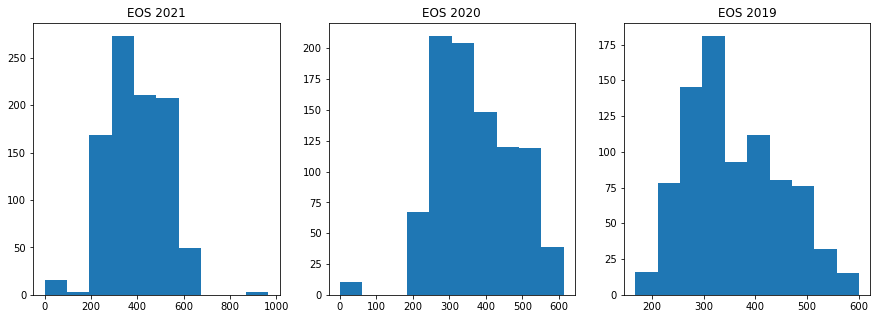

In [77]:
fig, ([ax1, ax2, ax3]) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('EOS 2021')
ax2.set_title('EOS 2020')
ax3.set_title('EOS 2019')

ax1.hist(allcourses_notest['EOS_2021'])
ax2.hist(allcourses_notest['EOS_2020'])
ax3.hist(allcourses_notest['EOS_2019'])

plt.show()

<br>

#### Mid distribution

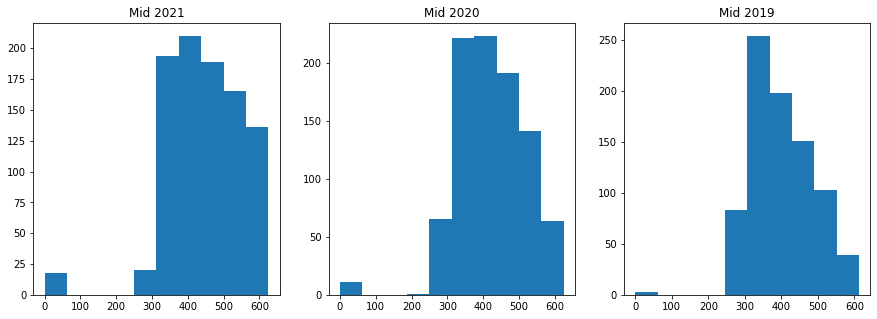

In [86]:
fig, ([ax1, ax2, ax3]) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('Mid 2021')
ax2.set_title('Mid 2020')
ax3.set_title('Mid 2019')

ax1.hist(allcourses_notest['Mid_2021'])
ax2.hist(allcourses_notest['Mid_2020'])
ax3.hist(allcourses_notest['Mid_2019'])

plt.show()

<br>

#### EOS above 600

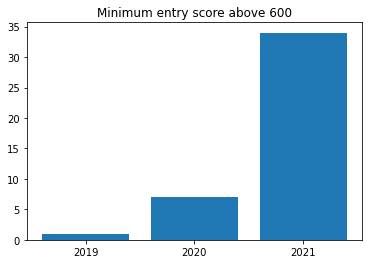

In [82]:
x=np.array(['2019','2020','2021'])
y=np.array([above600_2019,above600_2020,above600_2021])

plt.title('Minimum entry score above 600')
plt.bar(x,y, width=0.8)

plt.show()

<br><br>

## References

***
[1]: Reilly, G. (2013). Explainer: A beginner’s guide to the CAO Points system. *The Journal*. https://www.thejournal.ie/cao-points-system-explained-563406-Aug2013/. Access on 1 Jan, 2022.

[2]: pandas.DataFrame (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. Access on 2 Jan, 2022.

[3]: 10 minutes to pandas (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html. Access on 2 Jan, 2022.

[4]: How to replace text in a string column of a Pandas dataframe? (2015). *StackOverflow*. https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-column-of-a-pandas-dataframe. Access on 2 Jan, 2022.

[5]: pandas.DataFrame.fillna (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html. Access on 2 Jan, 2022.

[6]: pandas.DataFrame.dtypes (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html. Access on 2 Jan, 2022.

[7]: pandas.DataFrame.replace (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html. Access on 2 Jan, 2022.

[8]: Replace NaN Values with Zeros in Pandas DataFrame (2021). *Data to Fish*. https://datatofish.com/replace-nan-values-with-zeros/. Access on 2 Jan, 2022.

[9]: Missing data (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html. Access on 2 Jan, 2022.

[10]: pandas.DataFrame.astype (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html. Access on 2 Jan, 2022.

[11]: How to change the data type of columns in a Pandas DataFrame in Python (n.d.). *Kite*. https://www.kite.com/python/answers/how-to-change-the-data-type-of-columns-in-a-pandas-dataframe-in-python. Access on 2 Jan, 2022.

[12]: What is dtype('O'), in pandas? (2016). *StackOverflow*. https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas. Access on 2 Jan, 2022.

[13]: Indexing and selecting data (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html?highlight=query%20method. Access on 2 Jan, 2022.

[14]: Myrianthous,G. (2021). How To Delete Rows From Pandas DataFrames Based on Column Values. *Towards Data Science*. https://towardsdatascience.com/delete-row-from-pandas-dataframes-based-on-column-value-4b18bb1eb602. Access on 2 Jan, 2022.

[15]: pandas.DataFrame.describe (n.d.). *Pandas Official Documentation*. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html. Access on 2 Jan, 2022.

[16]: pandas.DataFrame.nlargest (n.d.). *Pandas Official Documentation*.https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html. Access on 2 Jan, 2022.

[17]: O'Brien, C. (2021). Record-breaking grades and high demand see significant rise in CAO points requirements. *Irish Times*. https://www.irishtimes.com/news/education/record-breaking-grades-and-high-demand-see-significant-rise-in-cao-points-requirements-1.4667346. Access on 2 Jan, 2022.

***

## End of notebook